In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Family
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import skimage as sk

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB,CategoricalNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,validation_curve,learning_curve

In [3]:
def load_image_file(Location ,dim=(64,64)):  
    """ * 64 is Height of image and 
        * 64 width of a image
    """
    image_dir = Path(Location)
    folders = [directory for directory  in image_dir.iterdir() if directory.is_dir()]
    categories  = [fo.name for fo in folders]
    
    
    images = []
    flat_data =[]
    target = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = sk.io.imread(file)
            #print("Before Transformation ")
            plt.imshow(img)
            plt.show()
            
            img_resized = resize(img, dim, anti_aliasing=True, mode='reflect')
            #print("After Transformation")
            plt.imshow(img_resized)
            #plt.show()
            
            # List Method append I am using Hear
            
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
            
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data = flat_data,
                target = target,
                target_names = categories,
                images = images)

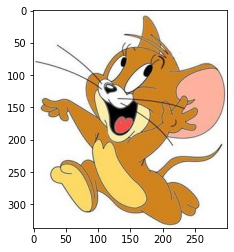

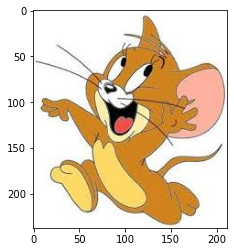

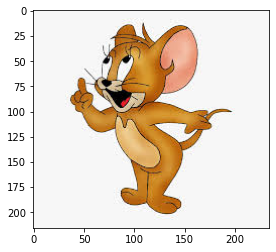

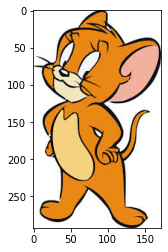

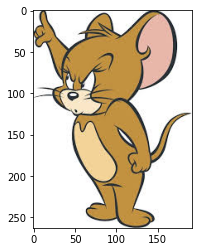

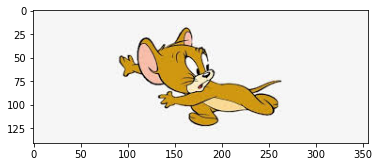

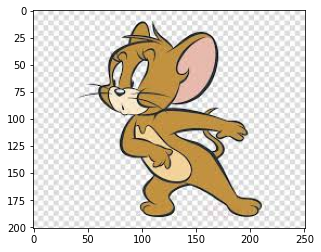

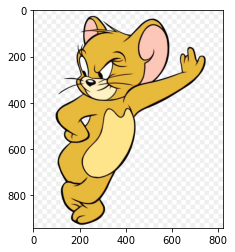

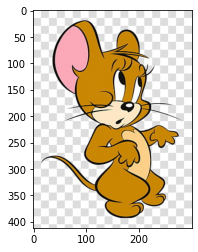

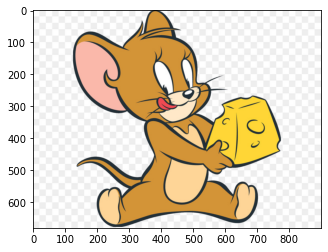

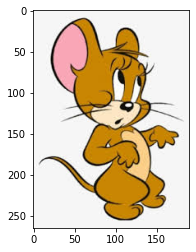

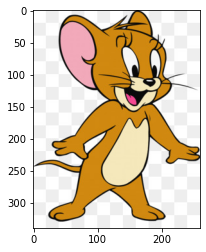

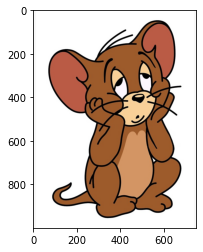

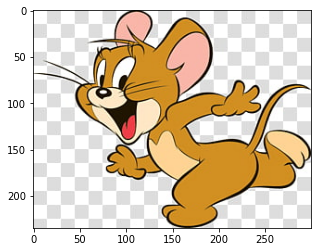

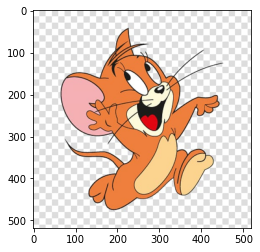

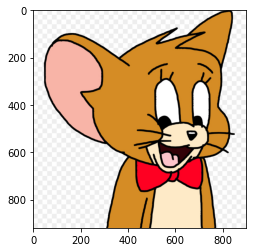

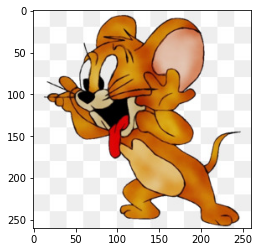

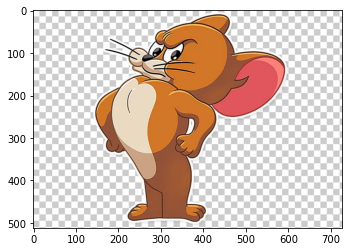

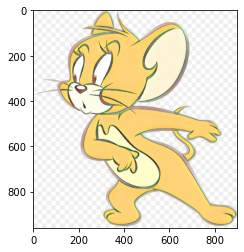

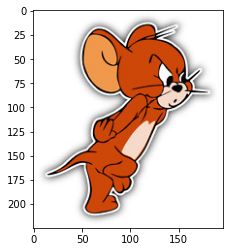

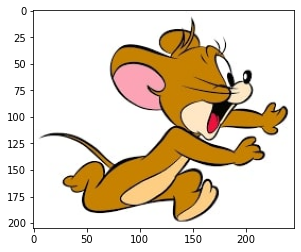

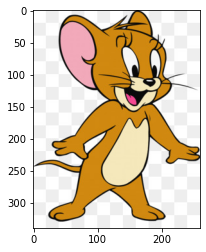

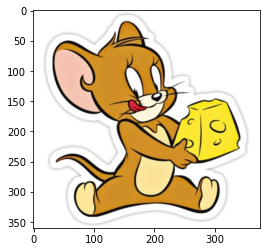

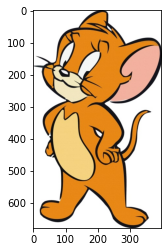

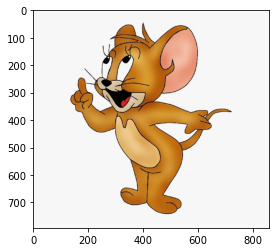

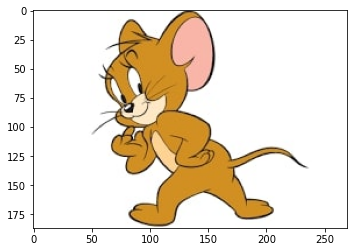

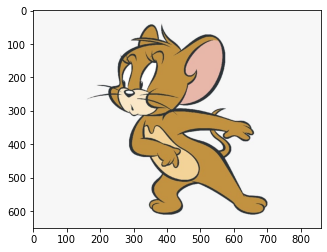

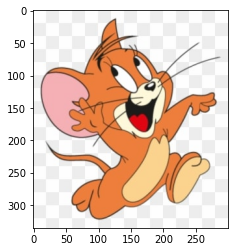

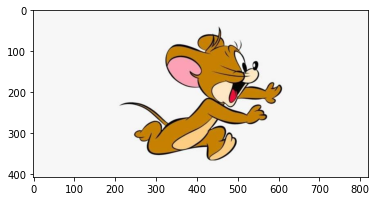

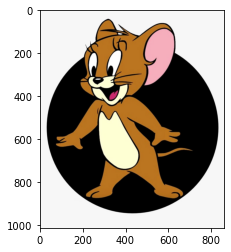

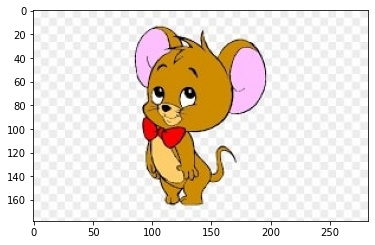

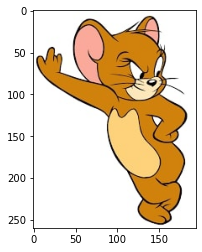

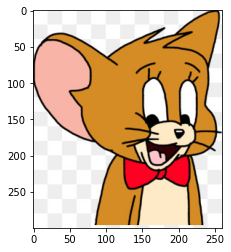

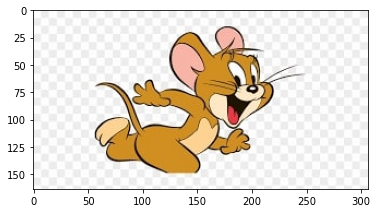

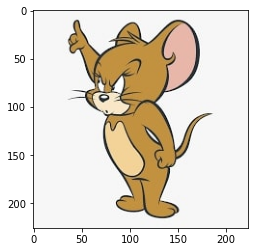

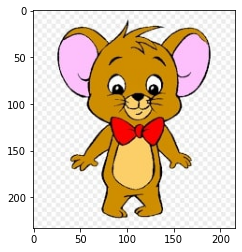

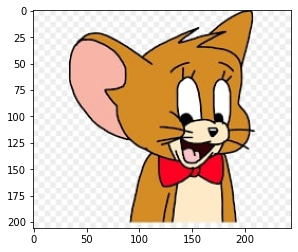

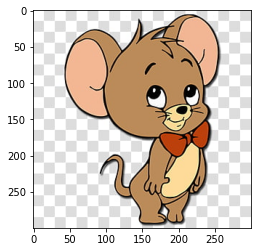

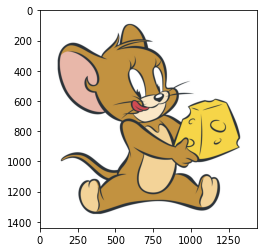

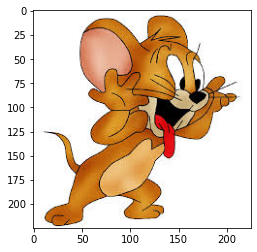

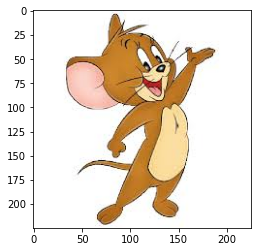

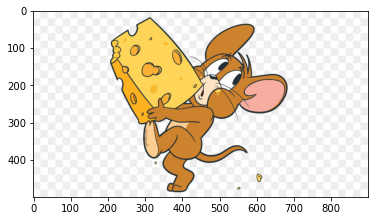

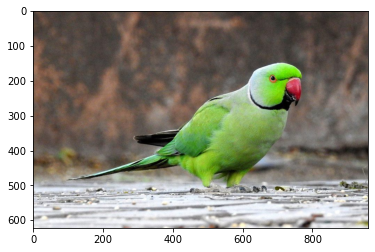

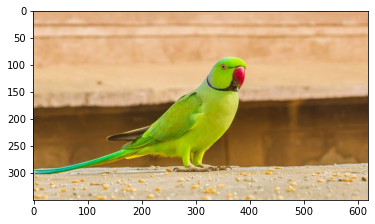

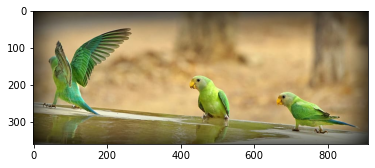

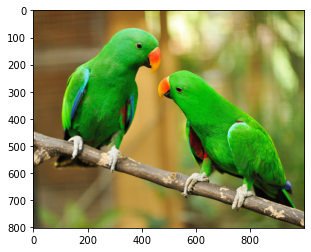

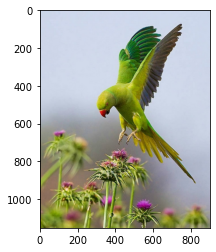

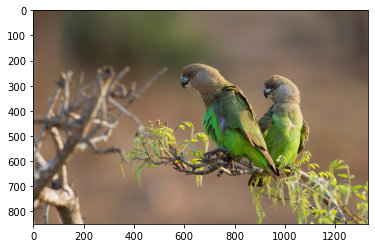

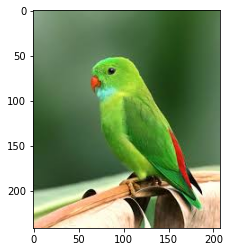

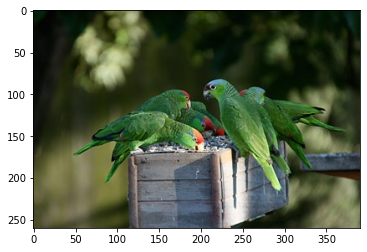

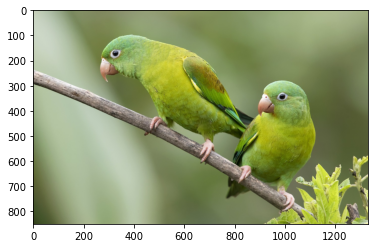

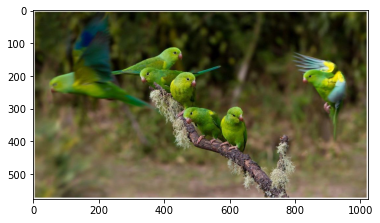

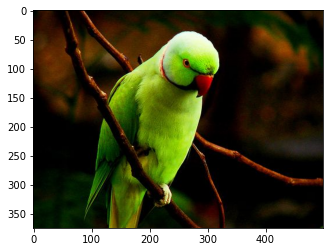

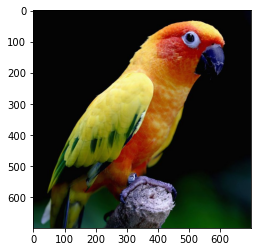

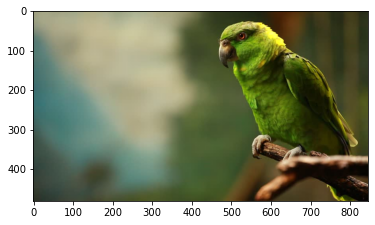

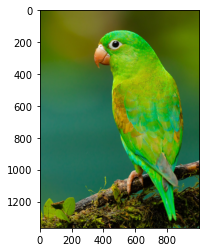

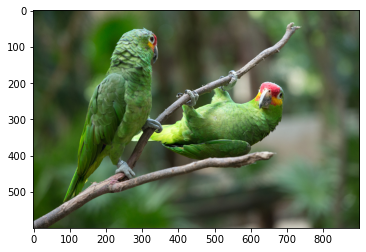

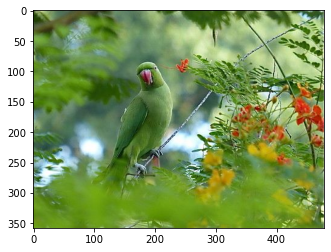

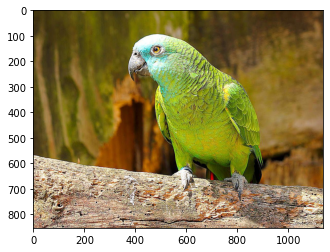

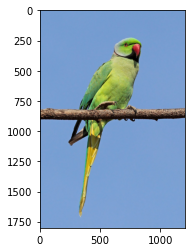

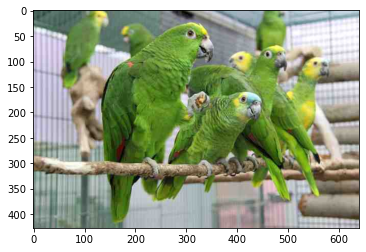

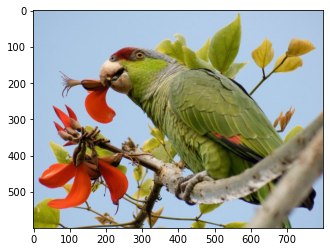

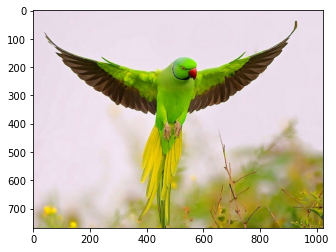

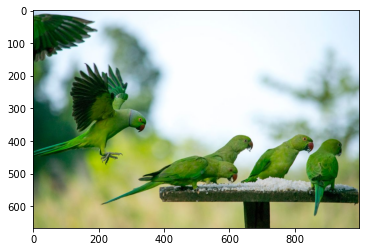

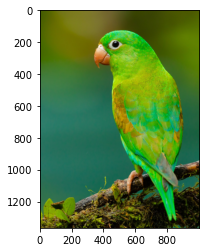

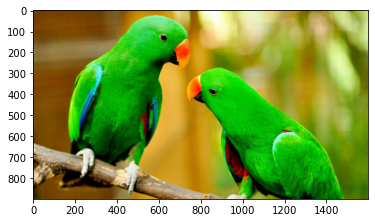

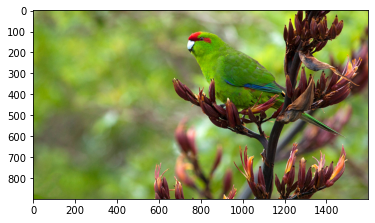

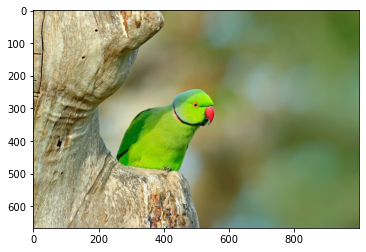

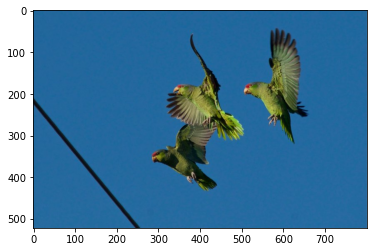

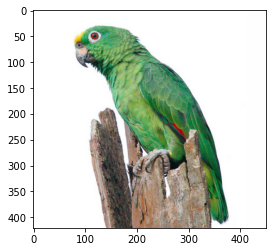

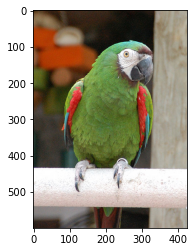

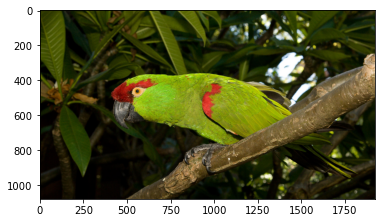

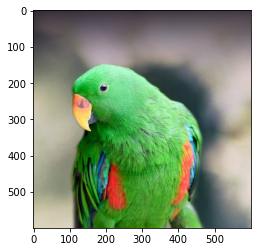

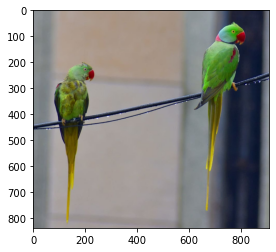

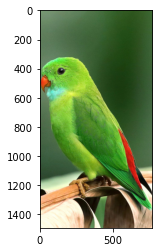

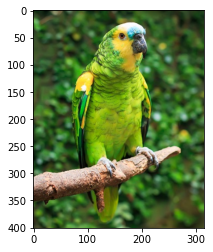

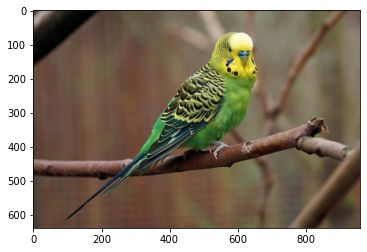

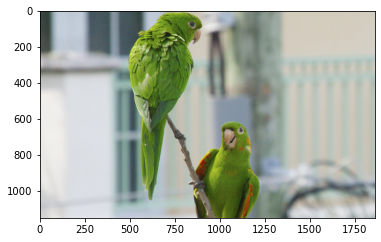

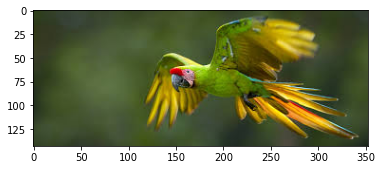

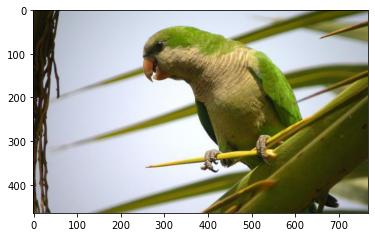

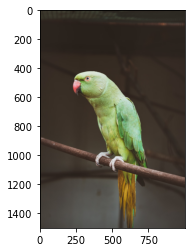

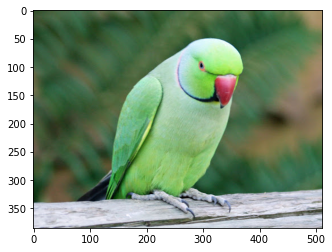

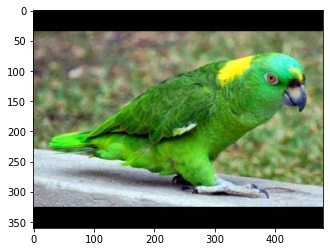

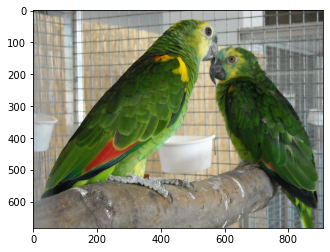

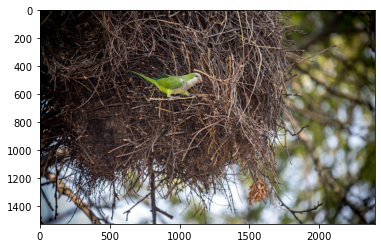

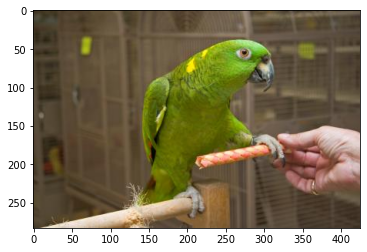

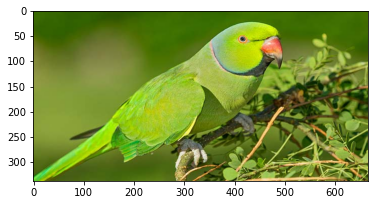

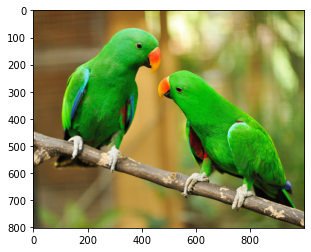

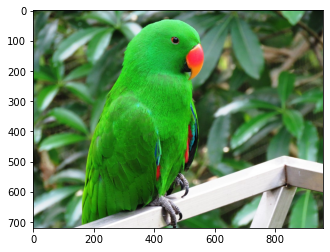

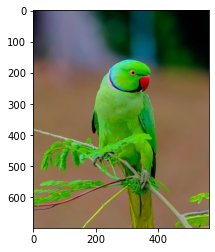

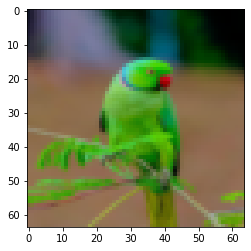

In [4]:
import skimage
image_dataset = load_image_file("Downloads/Tom-Jerry_Classification-master/Tom-Jerry_Classification-master/Data/Tom_Jerry")

In [5]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images'])

In [6]:
X_train,X_test, y_train, y_test=train_test_split(image_dataset.data,image_dataset.target)

In [7]:
X_train.shape

(67, 12288)

In [8]:
y_train.shape

(67,)

In [9]:
Lr = LogisticRegression(max_iter=500)
Lr.fit(X_train,y_train)
Lr_prediction = Lr.predict(X_test)
Lr_score = accuracy_score(y_test,Lr_prediction)
Lr_score

0.9130434782608695

[[13  1]
 [ 1  8]]


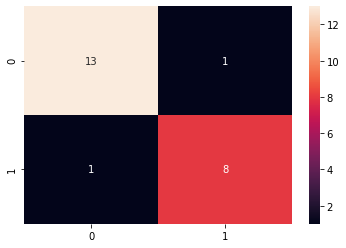

In [10]:
cm = confusion_matrix(y_test,Lr_prediction)
print(cm)
sns.heatmap(cm,annot=True)

In [11]:
Lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [12]:
train_sizes,train_score,valid_score = learning_curve(Lr,X_train,y_train,cv=10)

In [13]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

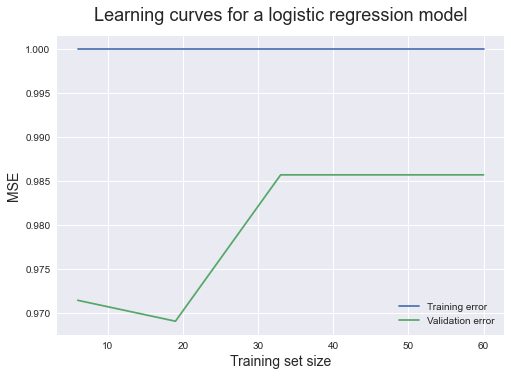

In [14]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression model', fontsize = 18, y = 1.03)
plt.legend()
# plt.ylim(0,40)


In [15]:
Lr = LogisticRegression()
knn = KNeighborsClassifier()
nb_bn = BernoulliNB()
nb_cat = CategoricalNB()
nn_com = CategoricalNB()
nb_g = GaussianNB()
nb_m = MultinomialNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
Ada = AdaBoostClassifier()
Gbc = GradientBoostingClassifier()
svc = SVC()
svc_linear = LinearSVC()

In [16]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc_linear = LinearSVC()

In [18]:
model = SVC(kernel='linear',C=1E10)

In [19]:
model.fit(X_train,y_train)

SVC(C=10000000000.0, kernel='linear')

In [20]:
New_prediction = model.predict(X_test)
New_prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0])

In [21]:
yhat = pd.DataFrame({'ACTUAL_DATA':y_test,
                    "New_prediction":New_prediction})

In [22]:
yhat

ACTUAL_DATA  New_prediction
0             1               1
1             1               0
2             0               0
3             1               1
4             0               0
5             0               0
6             0               0
7             0               0
8             0               0
9             0               0
10            1               1
11            0               1
12            1               1
13            0               0
14            1               1
15            1               1
16            0               0
17            0               0
18            0               0
19            0               0
20            1               1
21            1               1
22            0               0

In [25]:
Train_Score = model.score(X_train,y_train)
Train_Score

1.0

In [26]:
Test_Score = model.score(X_test,y_test)
Test_Score

0.9130434782608695

In [27]:
Lr_score = accuracy_score(y_test,New_prediction)


In [28]:
Lr_score

0.9130434782608695

[[13  1]
 [ 1  8]]


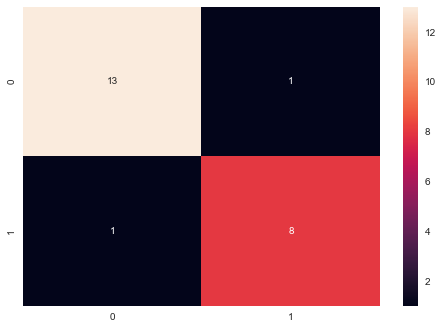

In [29]:
cm = confusion_matrix(y_test,New_prediction)
print(cm)
sns.heatmap(cm,annot=True)

In [53]:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [50]:
train_sizes,train_score,valid_score = learning_curve(model,X_train,y_train,cv=10)

In [34]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

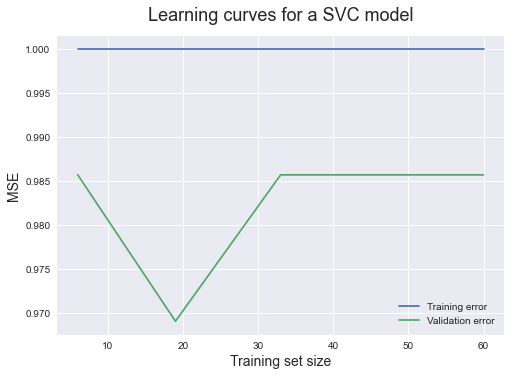

In [36]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVC model', fontsize = 18, y = 1.03)
plt.legend()


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
Knn = KNeighborsClassifier(n_neighbors=10)

In [58]:
model1 = Knn.fit(X_train,y_train)
model1

KNeighborsClassifier(n_neighbors=10)

In [41]:
Train_score = Knn.score(X_train,y_train)
Train_score

0.9850746268656716

In [45]:
knn_predict = Knn.predict(X_test)

In [47]:
Test_score = Knn.score(X_test,knn_predict)
Test_score

1.0

In [51]:
Lr_score = accuracy_score(y_test,New_prediction)
Lr_score

0.9130434782608695

[[13  1]
 [ 1  8]]


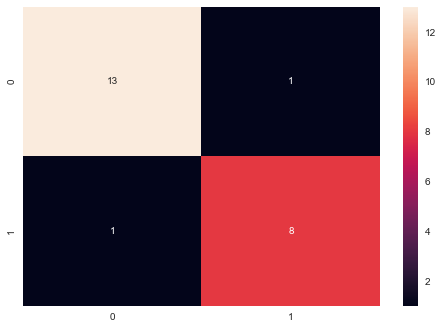

In [52]:
cm = confusion_matrix(y_test,knn_predict)
print(cm)
sns.heatmap(cm,annot=True)

In [54]:
model1.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
train_sizes,train_score,valid_score = learning_curve(model,X_train,y_train,cv=10)

In [62]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

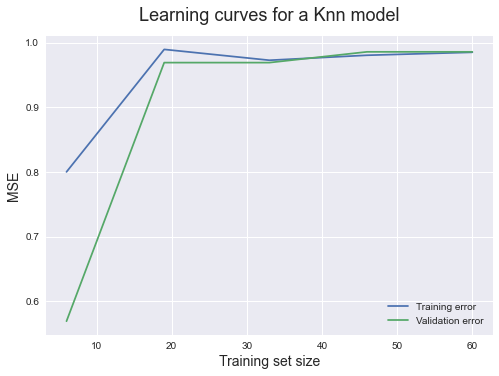

In [64]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Knn model', fontsize = 18, y = 1.03)
plt.legend()

In [119]:
Bnb = BernoulliNB()
Bnb_model=Bnb.fit(X_train,y_train)

In [73]:
Bnb.alpha

1.0

In [120]:
Train_Score = Bnb.score(X_train,y_train)
Train_Score

0.4925373134328358

In [121]:
Bnb_new_prediction = Bnb.predict(X_test)

In [122]:
Test_Score = Bnb.score(X_test,y_test)
Test_Score

0.7391304347826086

In [126]:
train_sizes,train_score,valid_score = learning_curve(Bnb_model,X_train,y_train,cv=10)

In [127]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

Text(0.5, 1.03, 'Learning curves for a Bnb model')

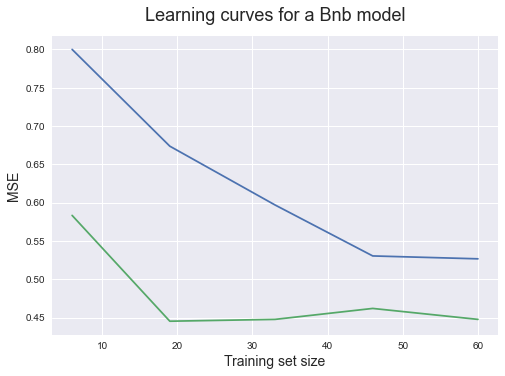

In [128]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Bnb model', fontsize = 18, y = 1.03)

In [123]:
Cnb = ComplementNB()
Cnb_model=Cnb.fit(X_train,y_train)

In [100]:
Cnb.alpha

1.0

In [102]:
Train_Score = Cnb.score(X_train,y_train)
Train_Score

0.9402985074626866

In [104]:
Cnb_new_prediction = Cnb.predict(X_test)
Cnb_new_prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0])

In [106]:
Test_Score = Cnb.score(X_test,y_test)
Test_Score

0.9130434782608695

In [129]:
train_sizes,train_score,valid_score = learning_curve(Cnb_model,X_train,y_train,cv=10)

In [130]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

Text(0.5, 1.03, 'Learning curves for a Cnb model')

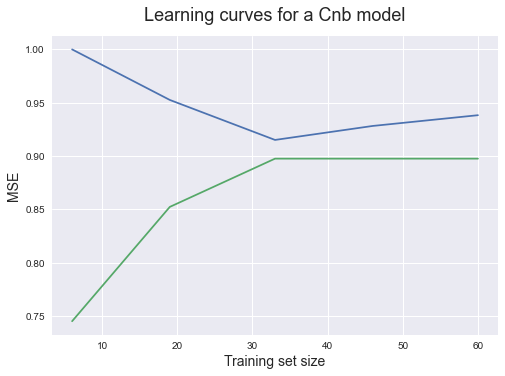

In [131]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Cnb model', fontsize = 18, y = 1.03)

In [98]:
Mnb = MultinomialNB()
Gnb = GaussianNB()

In [155]:
Mnb_new_pred = Mnb.predict(X_test)

In [109]:
Mult_Model = Mnb.fit(X_train,y_train)

In [110]:
Train_Score = Mnb.score(X_train,y_train)
Train_Score

0.9402985074626866

In [111]:
Test_Score = Mnb.score(X_test,y_test)
Test_Score

0.9130434782608695

In [132]:
train_sizes,train_score,valid_score = learning_curve(Mult_Model,X_train,y_train,cv=10)

In [133]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

Text(0.5, 1.03, 'Learning curves for a Mnb model')

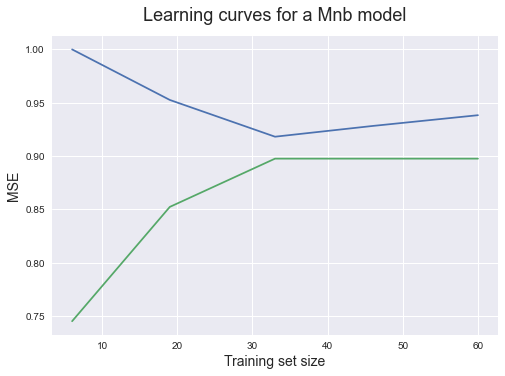

In [134]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Mnb model', fontsize = 18, y = 1.03)

In [112]:
GNB_model = Gnb.fit(X_train,y_train)

In [114]:
Train_Score = Gnb.score(X_train,y_train)
Train_Score

1.0

In [116]:
Gnb_new_prediction = Gnb.predict(X_test)

In [118]:
Test_Score = Gnb.score(X_test,y_test)
Test_Score

0.9130434782608695

In [135]:
train_sizes,train_score,valid_score = learning_curve(GNB_model,X_train,y_train,cv=10)

In [136]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

Text(0.5, 1.03, 'Learning curves for a Gnb model')

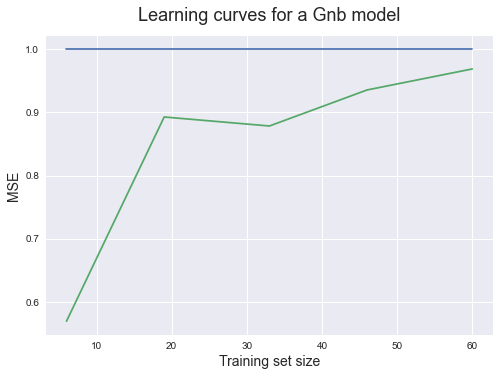

In [137]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Gnb model', fontsize = 18, y = 1.03)

In [125]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [138]:
Train_Score = clf.score(X_train,y_train)
Train_Score

1.0

In [139]:
clf_predict = clf.predict(X_test)

In [140]:
Test_Score = clf.score(X_test,clf_predict)
Test_Score

1.0

In [141]:
train_sizes,train_score,valid_score = learning_curve(clf,X_train,y_train,cv=10)

In [142]:
train_score_mean = train_score.mean(axis=1)
valid_score_mean = valid_score.mean(axis=1)

Text(0.5, 1.03, 'Learning curves for a DecisionTreeClassifier model')

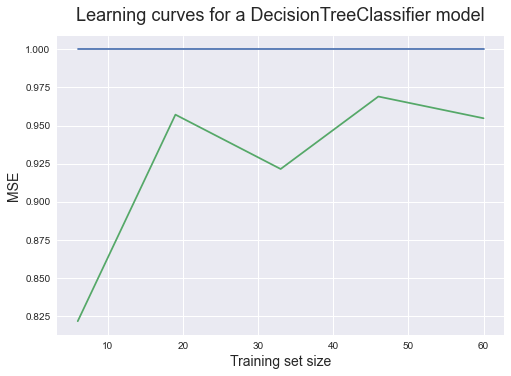

In [144]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a DecisionTreeClassifier model', fontsize = 18, y = 1.03)

In [145]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf_model = clf.fit(X_train,y_train)

In [146]:
y_pred = clf.predict(X_test)

In [147]:
Train_Score = clf.score(X_train,y_train)
Train_Score

1.0

In [148]:
Test_Score = clf.score(X_test,y_test)
Test_Score

0.9565217391304348

In [149]:
train_sizes,train_score,valid_score = learning_curve(clf_model,X_train,y_train,cv=10)

Text(0.5, 1.03, 'Learning curves for a RandomForestClassifier model')

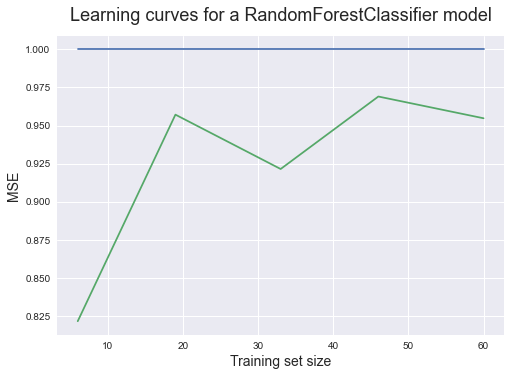

In [150]:
plt.style.use('seaborn')
plt.plot(train_sizes,  train_score_mean, label = 'Training error')
plt.plot(train_sizes, valid_score_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RandomForestClassifier model', fontsize = 18, y = 1.03)

In [151]:
Features = image_dataset.data

In [152]:
target = image_dataset.target

In [157]:
df = pd.DataFrame({'Logistic_pred':Lr_prediction,
                  'yhat_prob':y_test,
                  'knn_prediction':knn_predict,
                  'Bnb_prediction':Bnb_new_prediction,
                  'Cnb_prediction':Cnb_new_prediction,
                  'Mnb_pred':Mnb_new_pred,
                  'Gnb_prediction':Gnb_new_prediction,
                  'clf_prediction':clf_predict,
                  'y_predion':y_pred})
df

Logistic_pred  yhat_prob  knn_prediction  Bnb_prediction  Cnb_prediction  \
0               1          1               1               0               1   
1               0          1               0               0               0   
2               0          0               0               0               0   
3               1          1               1               0               1   
4               0          0               0               0               0   
5               0          0               0               0               0   
6               0          0               0               0               0   
7               0          0               0               0               0   
8               0          0               0               0               0   
9               0          0               0               0               0   
10              1          1               1               1               1   
11              1          0               1               0               0   
12              1          1               1               1               1   
13              0          0               0               0               0   
14              1          1               1               0               1   
15              1          1               1               0               1   
16              0          0               0               0               0   
17              0          0               0               0               0   
18              0          0               0               0               0   
19              0          0               0               0               0   
20              1          1               1               1               1   
21              1          1               1               0               0   
22              0          0               0               0               0   

    Mnb_pred  Gnb_prediction  clf_prediction  y_predion  
0          1               1               1          1  
1          0               0               0          0  
2          0               0               0          0  
3          1               1               1          1  
4          0               0               0          0  
5          0               0               0          0  
6          0               0               0          0  
7          0               0               0          0  
8          0               0               0          0  
9          0               0               0          0  
10         1               1               1          1  
11         0               1               0          0  
12         1               1               1          1  
13         0               0               0          0  
14         1               1               0          1  
15         1               1               1          1  
16         0               0               0          0  
17         0               0               0          0  
18         0               0               0          0  
19         0               0               0          0  
20         1               1               1          1  
21         0               1               1          1  
22         0               0               0          0

ValueError: Found input variables with inconsistent numbers of samples: [23, 90, 90]

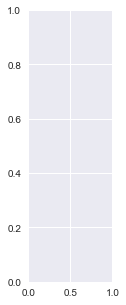

In [163]:
plt.figure(figsize=(16,5))

for model, i in [(KNeighborsClassifier(), 1), (BernoulliNB(),2),(MultinomialNB(),3),(ComplementNB(),4),
                 (GaussianNB(),5),(LogisticRegression(),6),(DecisionTreeClassifier(),7),
                 (RandomForestClassifier(),8),(SVC(),9)]:
   plt.subplot(1,9,i)
   learning_curve(model, df, Features, target, train_sizes, 5)
